In [1]:
# !pip3 install --user uproot

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
mc_data = np.load("../Data/out_data0_evt2.npy")


In [20]:
mc_data.shape

(30720, 4494)

In [21]:
event_step = 30720
ada_step = 12
collection_step = 960
readout_step = 800

In [25]:
collection_channels = mc_data[mc_data[:, 2] == 1][:, 3:]
readout_channels = mc_data[mc_data[:, 2] == 0][:, 3:]

In [26]:
readout_channels.shape

(30720, 4491)

In [27]:
collection_channels.shape

(0, 4491)

In [29]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import ScalarMappable

from sklearn.preprocessing import StandardScaler, QuantileTransformer
import skimage


def plot_plane(adcs, fig, axis, figsize=None, title='pcolormesh with levels'):
    y, x = np.mgrid[slice(0, adcs.shape[1], 1),
                    slice(0, adcs.shape[0], 1)]
    z = adcs.T
    levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())
    cmap = plt.get_cmap('coolwarm')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    axis.set_title(title)
    im = axis.pcolormesh(x, y, z, cmap=cmap, norm=norm)
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axis)
#     cbar.ax.set_title("scale")

def max_pool(a, k):
    return skimage.measure.block_reduce(a, (k,k), np.max)

def scale(a):
    return StandardScaler().fit_transform(a)
    
def plot_apa(apa, figsize=None, title='APA#None'):    
    fig, axes = plt.subplots(3, 1, figsize=(30, 50))
    plot_plane(scale(apa[:readout_step]), fig, axes[0],  title=title+' first readout plane')
    plot_plane(scale(apa[readout_step:2*readout_step]), fig, axes[1], title=title+' second readout plane')
    # im = plot_plane(scale(apa[2*readout_step:]), fig, axes[2], title=title+' collection plane')
    plt.tight_layout()
#     plt.colorbar()
    plt.show()

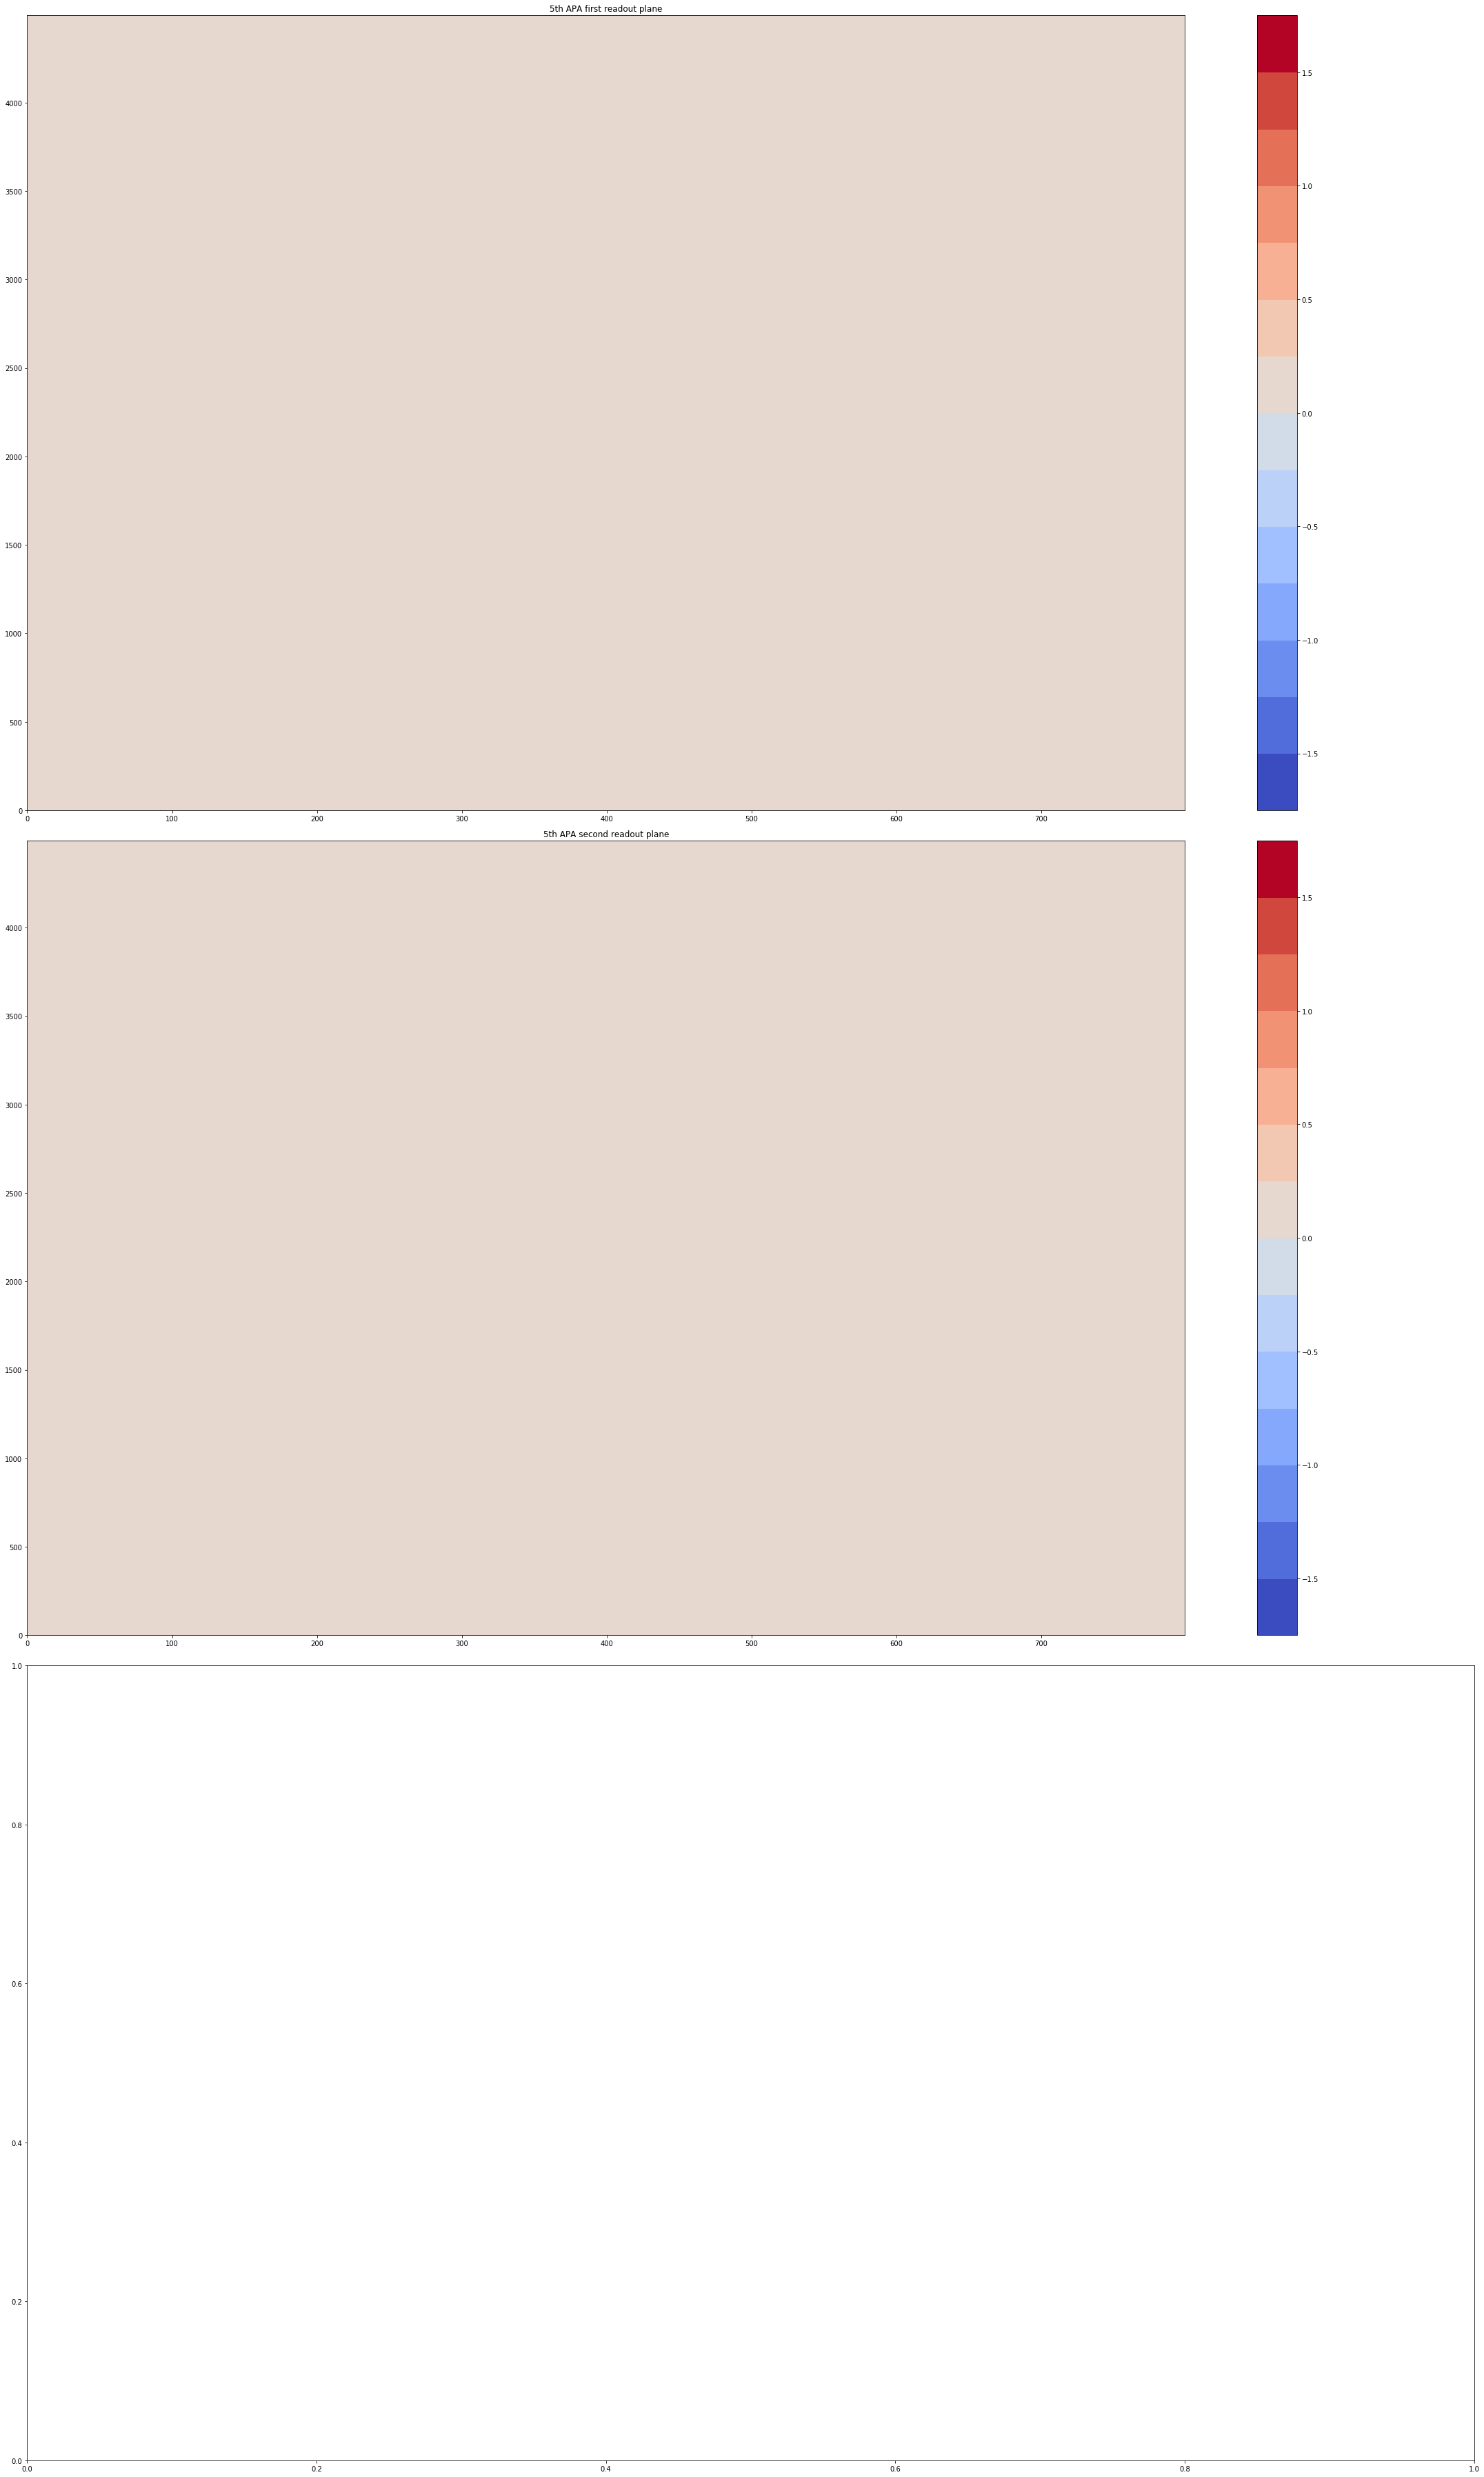

In [34]:
plot_apa(mc_data[:2*readout_step], title='5th APA')